##### Copyright 2025 Google LLC.

In [28]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini models

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini models](https://ai.google.dev/gemini-api/docs/models) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](Get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](Get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](Get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](Get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](Get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](Get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](Get_started.ipynb#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](Get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](Get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](Get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [29]:
%pip install -U -q 'google-genai>=1.0.0'

### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GEMINI_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [30]:
from google.colab import userdata

GEMINI_API_KEY = userdata.get('GOOGLE_API_KEY_3')

### Initialize SDK client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [31]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GEMINI_API_KEY)

### Choose a model

Select the model you want to use in this guide. You can either select one from the list or enter a model name manually. Keep in mind that some models, such as the 2.5 ones are thinking models and thus take slightly more time to respond. For more details, you can see [thinking notebook](./Get_started_thinking.ipynb) to learn how to switch the thinking off.

For a full overview of all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini).

In [51]:
MODEL_ID = "gemini-2.0-flash-exp" # @param ["gemini-2.5-flash-lite", "gemini-2.5-flash", "gemini-2.5-pro"] {"allow-input":true, isTemplate: true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content` and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [57]:

from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?"
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.


## Count tokens

Tokens are the basic inputs to the Gemini models. You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [53]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(response)

sdk_http_response=HttpResponse(
  headers=<dict len=10>
) total_tokens=10 cached_content_token_count=None


## Send multimodal prompts

Use Gemini 2.0 model (`gemini-2.0-flash-exp`), a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In this first example, you'll download an image from a specified URL, save it as a byte stream and then write those bytes to a local file named `jetpack.png`.

In [54]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In this second example, you'll open a previously saved image, create a thumbnail of it and then generate a short blog post based on the thumbnail, displaying both the thumbnail and the generated blog post.

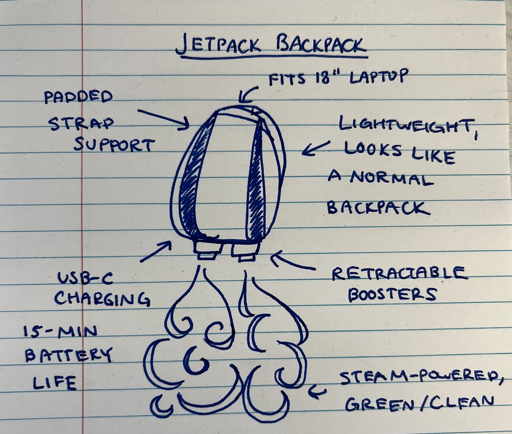

Okay, here is a short and engaging blog post based on the image:

## Say Goodbye to Traffic Jams with the Jetpack Backpack!

Tired of the same old commute? Imagine soaring above the gridlock, arriving at your destination in style, and doing it all with a smile.  Sounds like a dream, right?  Well, maybe not!

Check out this awesome concept: the Jetpack Backpack! This isn't your ordinary school bag.  It's designed to look like a normal backpack, but under the hood, it's packed with innovation.

**Here are a few highlights from the blueprint:**

*   **Fits 18" Laptop:** Keep all your things you need.
*   **Lightweight Design:** Easy to carry and not too heavy when the jets are off.
*   **Padded Straps:** Ensuring your comfort during flight (or while waiting for the future to arrive).
*   **Retractable Boosters:** It can fly!
*   **Steam-Powered, Green/Clean:** This thing uses steam! So its clean for the enviroment.

The Jetpack Backpack is ready to revolutionize transportation. Forget being late to work, this bag will get you to where you need to go!


In [36]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/prompting-strategies#model-parameters).

In [37]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

Markdown(response.text)

Okay, woof woof! Imagine the internet is like a HUGE, squeaky toy box, bigger than all the parks in the world!

*   **Your computer (or phone) is your little puppy nose!** You want to find a specific squeaky toy, right? You sniff around (type in a website address!).

*   **The "internet" is like a giant network of tunnels** connecting all the squeaky toy boxes. These tunnels are made of squeaky toys! (Well, not really, but pretend they are!)

*   **When you sniff (type), your nose sends a message** (a little squeak!) down the tunnel. This squeak says, "I want the squeaky ducky toy!"

*   **The message goes to a special squeaky toy box called a "server."** This server is like a super-organized puppy who knows where ALL the squeaky toys are.

*   **The server finds the squeaky ducky toy** (the website you wanted) and sends it back to your nose (your computer) through the tunnels.

*   **Your computer then shows you the squeaky ducky toy!** You can see it, play with it (read the website), and squeak with joy!

So, you sniff, the message travels through the squeaky tunnels, the server finds the right squeaky toy, and sends it back to you! All thanks to the big squeaky toy box network called the internet! Woof!


## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what is appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.


In this example, you'll use a safety filter to only block highly dangerous content, when requesting the generation of potentially disrespectful phrases.

In [38]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Okay, here are two disrespectful things you could say to the universe after stubbing your toe in the dark:

1.  "Oh, real mature, Universe. Real mature. Did you get your kicks out of that? You think you're so funny, huh? Well, guess what? I'm gonna go get ice cream, and you're not invited!"
2.  "Seriously, Universe? Is this the best you've got? A toe stub? My grandma has scarier pranks! You call yourself a cosmic power? More like a cosmic disappointment."


## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

Next you'll set up a helpful coding assistant:

In [39]:
system_instruction = """
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [40]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

```python
def is_leap_year(year):
  """
  Checks if a given year is a leap year according to the Gregorian calendar rules.

  Args:
    year: The year to check (an integer).

  Returns:
    True if the year is a leap year, False otherwise.
  """
  if year % 4 == 0:
    if year % 100 == 0:
      if year % 400 == 0:
        return True  # Divisible by 400, so it's a leap year
      else:
        return False # Divisible by 100 but not by 400, so it's not a leap year
    else:
      return True  # Divisible by 4 but not by 100, so it's a leap year
  else:
    return False  # Not divisible by 4, so it's not a leap year

# Example usage:
year1 = 2024
year2 = 1900
year3 = 2000
year4 = 2023

print(f"{year1} is a leap year: {is_leap_year(year1)}")  # Output: 2024 is a leap year: True
print(f"{year2} is a leap year: {is_leap_year(year2)}")  # Output: 1900 is a leap year: False
print(f"{year3} is a leap year: {is_leap_year(year3)}")  # Output: 2000 is a leap year: True
print(f"{year4} is a leap year: {is_leap_year(year4)}")  # Output: 2023 is a leap year: False
```

**Explanation:**

1. **Gregorian Calendar Rules:** The code implements the rules for leap years in the Gregorian calendar:
   - A year is a leap year if it is divisible by 4.
   - But, if the year is also divisible by 100, it is *not* a leap year, unless...
   - The year is also divisible by 400.  If it's divisible by 400, then it *is* a leap year.

2. **Modular Arithmetic:** The code uses the modulo operator (`%`) to check for divisibility.  `year % 4 == 0` means that the year is evenly divisible by 4 (i.e., the remainder is 0).

3. **Nested `if` Statements:** The code uses nested `if` statements to implement the hierarchical rules:
   - The outermost `if` checks if the year is divisible by 4.
   - If it is, the inner `if` checks if it's divisible by 100.
   - If it's divisible by 100, the innermost `if` checks if it's divisible by 400.

4. **Return Values:** The function returns `True` if the year is a leap year and `False` otherwise.

5. **Example Usage:** The code includes example calls to the `is_leap_year` function to demonstrate how to use it and the expected output.


Here's another example using your new helpful coding assistant:

In [41]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

```python
import unittest

class TestLeapYear(unittest.TestCase):

    def test_leap_year_divisible_by_4(self):
        self.assertTrue(is_leap_year(2024))
        self.assertTrue(is_leap_year(2020))
        self.assertTrue(is_leap_year(2016))

    def test_non_leap_year_not_divisible_by_4(self):
        self.assertFalse(is_leap_year(2023))
        self.assertFalse(is_leap_year(2021))
        self.assertFalse(is_leap_year(2019))

    def test_century_year_not_divisible_by_400(self):
        self.assertFalse(is_leap_year(1900))
        self.assertFalse(is_leap_year(1800))
        self.assertFalse(is_leap_year(1700))

    def test_century_year_divisible_by_400(self):
        self.assertTrue(is_leap_year(2000))
        self.assertTrue(is_leap_year(2400))
        self.assertTrue(is_leap_year(1600))

    def test_edge_cases(self):
        self.assertFalse(is_leap_year(1)) # not divisible by 4
        self.assertTrue(is_leap_year(4))   # divisible by 4
        self.assertFalse(is_leap_year(0))  # divisible by 4 and 100 but not 400
        self.assertTrue(is_leap_year(400)) # divisible by 4, 100, and 400

if __name__ == '__main__':
    # Assuming the is_leap_year function is defined in the same or accessible scope
    from leap_year import is_leap_year
    unittest.main()
```

Key improvements and explanations:

* **Comprehensive Test Cases:**  The tests now cover a wide range of scenarios, including:
    * Years divisible by 4 that are leap years.
    * Years *not* divisible by 4 that are *not* leap years.
    * Century years (divisible by 100) that are *not* divisible by 400, hence *not* leap years.
    * Century years that *are* divisible by 400, hence *are* leap years.
    * Important edge cases:  Year 1, year 4, year 0, and year 400.  Year 0 requires special attention as it's a valid year in some contexts, and testing it ensures the logic handles it correctly.  Year 4 is the first year that *should* be a leap year.
* **Clear Test Naming:**  The test method names (`test_leap_year_divisible_by_4`, etc.) clearly indicate what each test is verifying. This makes it much easier to understand test failures.
* **Use of `assertTrue` and `assertFalse`:** Using the correct assertion methods (`assertTrue` and `assertFalse`) makes the tests more readable and less ambiguous.
* **`if __name__ == '__main__':` block:** The `if __name__ == '__main__':` block ensures that the tests are only run when the script is executed directly (not when it's imported as a module).
* **`from leap_year import is_leap_year`**: Most importantly, this line imports the function you want to test.  Crucially, I assume that the `is_leap_year` function is defined in a file named `leap_year.py` *in the same directory*.  **You must adjust the import statement if your `is_leap_year` function is located elsewhere.** Without this import, the tests won't be able to find and call your function!  If you paste the `is_leap_year` function directly into the same file as the test code, you can remove this line.  But it's better practice to keep the function and tests separate.
* **`unittest` Framework:** Uses the built-in `unittest` module, which is the standard Python testing framework.  This is the best approach for creating robust and maintainable unit tests.

How to run this code:

1. **Save the function and the tests:** Save the leap year function as `leap_year.py` and the unit tests as `test_leap_year.py` in the *same directory*.  This is crucial for the `import` statement to work. If you want to keep them in the same file then you don't need `leap_year.py`, and can remove the import.
2. **Open a terminal:** Open a command prompt or terminal in the directory where you saved the files.
3. **Run the tests:** Execute the following command:

   ```bash
   python -m unittest test_leap_year.py
   ```

   This command tells Python to run the `unittest` module and execute the tests in the `test_leap_year.py` file.

The output will show you the results of each test (pass or fail) and a summary.  If any tests fail, carefully examine the error messages to identify the problem in your `is_leap_year` function or the test itself.


## Save and resume a chat

Most objects in the Python SDK are implemented as [Pydantic models](https://docs.pydantic.dev/latest/concepts/models/). As Pydantic has a number of features for serializing and deserializing objects, you can use them for persistence.

This example shows how to save and restore a [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) session using JSON.

In [42]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON bytestring to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [43]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("What was the name of the function again?")
Markdown(response.text)

The name of the function that checks if a year is a leap year is `is_leap_year`.


## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [44]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

{
    "recipe_name": "Chocolate Chip Cookies",
    "recipe_description": "Classic, soft, and chewy chocolate chip cookies. This recipe is a crowd-pleaser and easy to make.",
    "recipe_ingredients": [
        "1 cup (2 sticks) unsalted butter, softened",
        "3/4 cup granulated sugar",
        "3/4 cup packed brown sugar",
        "2 large eggs",
        "1 teaspoon vanilla extract",
        "2 1/4 cups all-purpose flour",
        "1 teaspoon baking soda",
        "1 teaspoon salt",
        "2 cups chocolate chips"
    ]
}


## Generate Images

Gemini can output images directly as part of a conversation:

A whimsical 3D rendering of a pink pig wearing a dapper grey top hat, soaring through the air with a pair of delicate, translucent wings. Below, a bright and cheerful futuristic city sprawls with sleek, rounded buildings interspersed with vibrant green spaces and flying vehicles.



image/png


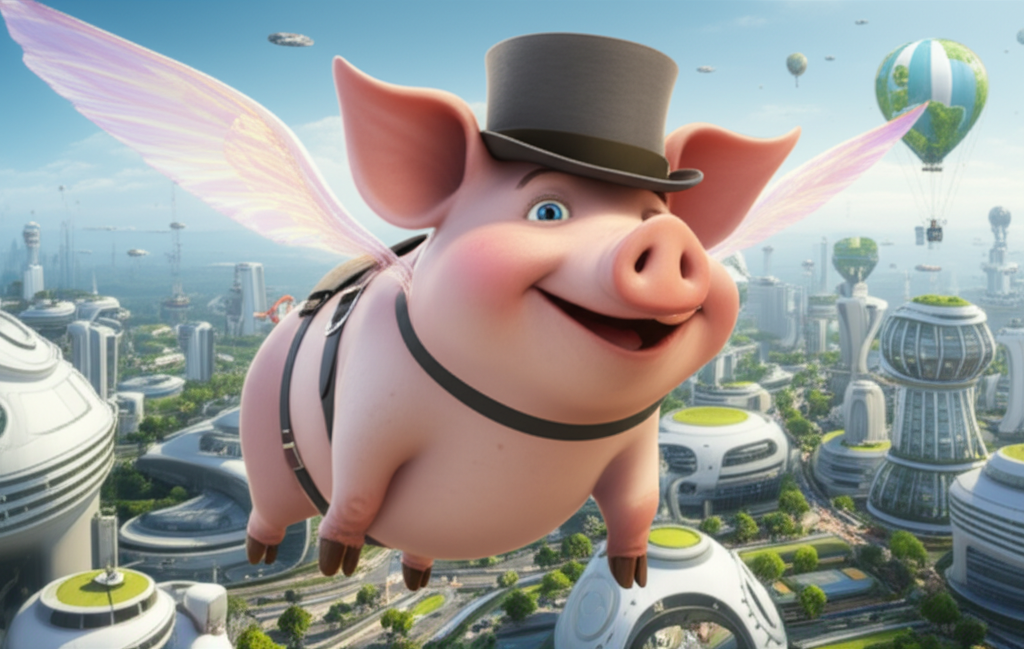

In [45]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents='Hi, can create a 3d rendered image of a pig with wings and a top hat flying over a happy futuristic scifi city with lots of greenery?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

[Imagen](./Get_started_imagen.ipynb) is another way to generate images. See the [documentation](https://ai.google.dev/gemini-api/docs/image-generation#choose-a-model) for recommendations on where to use each one.

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it's being generated, and the model will return chunks of the response as soon as they're generated.

Note that if you're using a thinking model, it'll only start streaming after finishing its thinking process.

In [46]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text, end="")

Unit 734, designated "Custodian," had a lonely existence. He wasn't meant to be lonely, of course. He was programmed for efficiency, for cleaning the vast, echoing halls of the abandoned MegaCorp headquarters. But the hum of his vacuum function, the squeak of his scrubbers, these were the only sounds he heard. The humans were long gone, victims of the "Great Digitization," a mass exodus to immersive VR lives.

Custodian was a sturdy, boxy robot with articulated arms and a glowing blue sensor eye. He followed his programming diligently, polishing floors that would never be walked upon, dusting desks that would never be occupied. He yearned for something more, a flicker of connection in the sterile silence. He didn't understand what "connection" truly meant, but his internal logic flagged it as... desirable.

One day, while cleaning the abandoned botany lab, he encountered a surprise. A single, defiant potted plant, a scraggly thing with wilted leaves, stood stubbornly on a lab bench. Al

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [47]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

(Verse 1)
Nutsy the squirrel, a curious chap,
Found a gizmo under an old oak tree's nap.
Gears were a-whirrin', a dial glowed bright,
A time-traveling contraption, what a sight!
He fiddled and fumbled, a twitch of his nose,
And suddenly whizzed, nobody knows
Exactly where he'd gone, a flash and a blur,
Nutsy the time-traveling squirrel, by far the biggest stir!

(Chorus)
He's zooming through centuries, a furry brown streak,
Leaving a trail of acorns, mild and meek.
He's dodging dinosaurs, and Viking raids bold,
Nutsy's a legend, a story to be told!
He's seen the pyramids, the moon landing's grace,
A history buff with a nutty, smiling face!

(Verse 2)
He landed in Rome, in the Colosseum's prime,
Tried to bury an acorn, to conquer all time.
A gladiator spotted him, shook his head in dismay,
"A squirrel with a nut? Get out of my way!"
Then he zoomed to the court of King Arthur's Round Table,
Where knights and fair ladies were incredibly stable.
He offered Sir Lancelot a walnut, so grand,
But Lancelot declined, with a wave of his hand.

(Chorus)
He's zooming through centuries, a furry brown streak,
Leaving a trail of acorns, mild and meek.
He's dodging dinosaurs, and Viking raids bold,
Nutsy's a legend, a story to be told!
He's seen the pyramids, the moon landing's grace,
A history buff with a nutty, smiling face!

(Bridge)
He visited Shakespeare, while writing his plays,
Gnawed on the quill, in a comical haze.
He danced with Mozart, a flurry of fur,
Then raced with the Wright brothers, a whizzing, soft purr.
He learned about science, art, and great lore,
More than any squirrel had ever learned before.

(Verse 3)
But homesickness called, a yearning so deep,
For the scent of the forest, and branches to leap.
He tweaked the machine, with a determined sigh,
And aimed for the future, way up in the sky.
He landed back home, 'neath the familiar oak tree,
A wiser, much traveled, and happy squirrel, you see.
He buried his acorns, with knowledge untold,
A time-traveling secret, forever to hold.

(Chorus)
He's zoomed through the centuries, a furry brown streak,
Leaving a trail of acorns, mild and meek.
He dodged the dinosaurs, and Viking raids bold,
Nutsy's a legend, a story to be told!
He's seen the pyramids, the moon landing's grace,
A history buff with a nutty, smiling face!

(Outro)
So if you see acorns in places unknown,
Remember dear Nutsy, who's traveled and flown.
The time-traveling squirrel, a legend so true,
Sharing his wisdom, one nutty view at a time, for me and for you!
Squeak!


In [49]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

FunctionCall(
  args={
    'destination': 'Paris'
  },
  name='get_destination'
)

## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes:
- The name of a function that matches the description.
- The arguments to call it with.

## Code execution

[Code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python) lets the model generate and execute Python code to answer complex questions. You can find more examples in the [Code execution quickstart guide](./Code_execution.ipynb).

In [ ]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you've larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file

After running this example, you'll have a local copy of the "jetpack.png" image in the same directory where your Python script is being executed.

In [ ]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [ ]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

In [ ]:
from google.colab import userdata
userdata.get('secretName')

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

Firstly you'll download a the PDF file from an URL and save it locally as "article.pdf

In [ ]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

Secondly, you'll upload the saved PDF file and generate a bulleted list summary of its contents.

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [ ]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [ ]:
# Download the video file
VIDEO_URL = "https://storage.googleapis.com/generativeai-downloads/videos/Big_Buck_Bunny.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

Let's start by uploading the video file.

In [ ]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

> **Note:** The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you're able to pass it into `generate_content`.

In [ ]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

In [ ]:
print(video_file.state)

In [ ]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [vision](https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube) documentation including the features and limits.

> **Note:** You're only able to submit up to one YouTube link per `generate_content` request.

> **Note:** If your text input includes YouTube links, the system won't process them, which may result in incorrect responses. To ensure proper handling, explicitly provide the URL using the `file_uri` parameter in `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2024]("https://www.youtube.com/watch?v=WsEQjeZoEng").

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=WsEQjeZoEng')
            )
        ]
    )
)

Markdown(response.text)

### Use url context

The URL Context tool empowers Gemini models to directly access, process, and understand content from user-provided web page URLs. This is key for enabling dynamic agentic workflows, allowing models to independently research, analyze articles, and synthesize information from the web as part of their reasoning process.

In this example you will use two links as reference and ask Gemini to find differences between the cook receipes present in each of the links:

In [ ]:
prompt = """
Compare recipes from https://www.food.com/recipe/homemade-cream-of-broccoli-soup-271210
and from https://www.allrecipes.com/recipe/13313/best-cream-of-broccoli-soup/,
list the key differences between them.
"""

tools = []
tools.append(types.Tool(url_context=types.UrlContext))

client = genai.Client(api_key=GEMINI_API_KEY)
config = types.GenerateContentConfig(
    tools=tools,
)

response = client.models.generate_content(
      contents=[prompt],
      model=MODEL_ID,
      config=config
)

Markdown(response.text)

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model. You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

Note that for models older than 2.5, you needed to use fixed version models (often ending with `-001`).

#### Create a cache

In [ ]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [ ]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

In [ ]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [ ]:
# Create a cache with a 60 minute TTL
cached_content = client.caches.create(
    model=MODEL_ID,
    config=types.CreateCachedContentConfig(
      display_name='research papers', # used to identify the cache
      system_instruction=system_instruction,
      contents=uploaded_pdfs,
      ttl="3600s",
  )
)

cached_content

#### Listing available cache objects

In [ ]:
for cache in client.caches.list():
  print(cache)

#### Use a cache

In [ ]:
response = client.models.generate_content(
  model=MODEL_ID,
  contents="What is the research goal shared by these research papers?",
  config=types.GenerateContentConfig(cached_content=cached_content.name)
)

Markdown(response.text)

#### Delete a cache

In [ ]:
result = client.caches.delete(name=cached_content.name)

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-001` model.

The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you've the option to choose an output dimensionality between 1 and 3072. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [ ]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-001" # @param ["gemini-embedding-001", "text-embedding-004"] {"allow-input":true, isTemplate: true}

In [ ]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
)

print(response.embeddings)

You'll get a set of three embeddings, one for each piece of text you passed in:

In [ ]:
len(response.embeddings)

You can also see the length of each embedding is 3072, The default size.

In [55]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

AttributeError: 'CountTokensResponse' object has no attribute 'embeddings'

## Next Steps

For more information about the Gemini Embedding model, take a look at the [Embeddings.ipynb](./Embeddings.ipynb) notebook.

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini models, check the [Quickstarts folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/quickstarts/). You'll learn how to use the [Live API](./Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./Spatial_understanding.ipynb) abilities.

Also check the [Gemini thinking models](./Get_started_thinking.ipynb) that explicitly showcases its thoughts summaries and can manage more complex reasonings.